In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score

from sklearn import tree

In [2]:
root_path = "https://raw.githubusercontent.com/matzim95/ML-datasets/master/"
dataset_name = "abalone.csv"
path_to_data = root_path + dataset_name
df_abalone = pd.read_csv(path_to_data)

In [3]:
df_abalone

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df_abalone["sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [5]:
df_abalone["sex"] = df_abalone["sex"].map({"M":"NI", "F":"NI", "I": "I"})

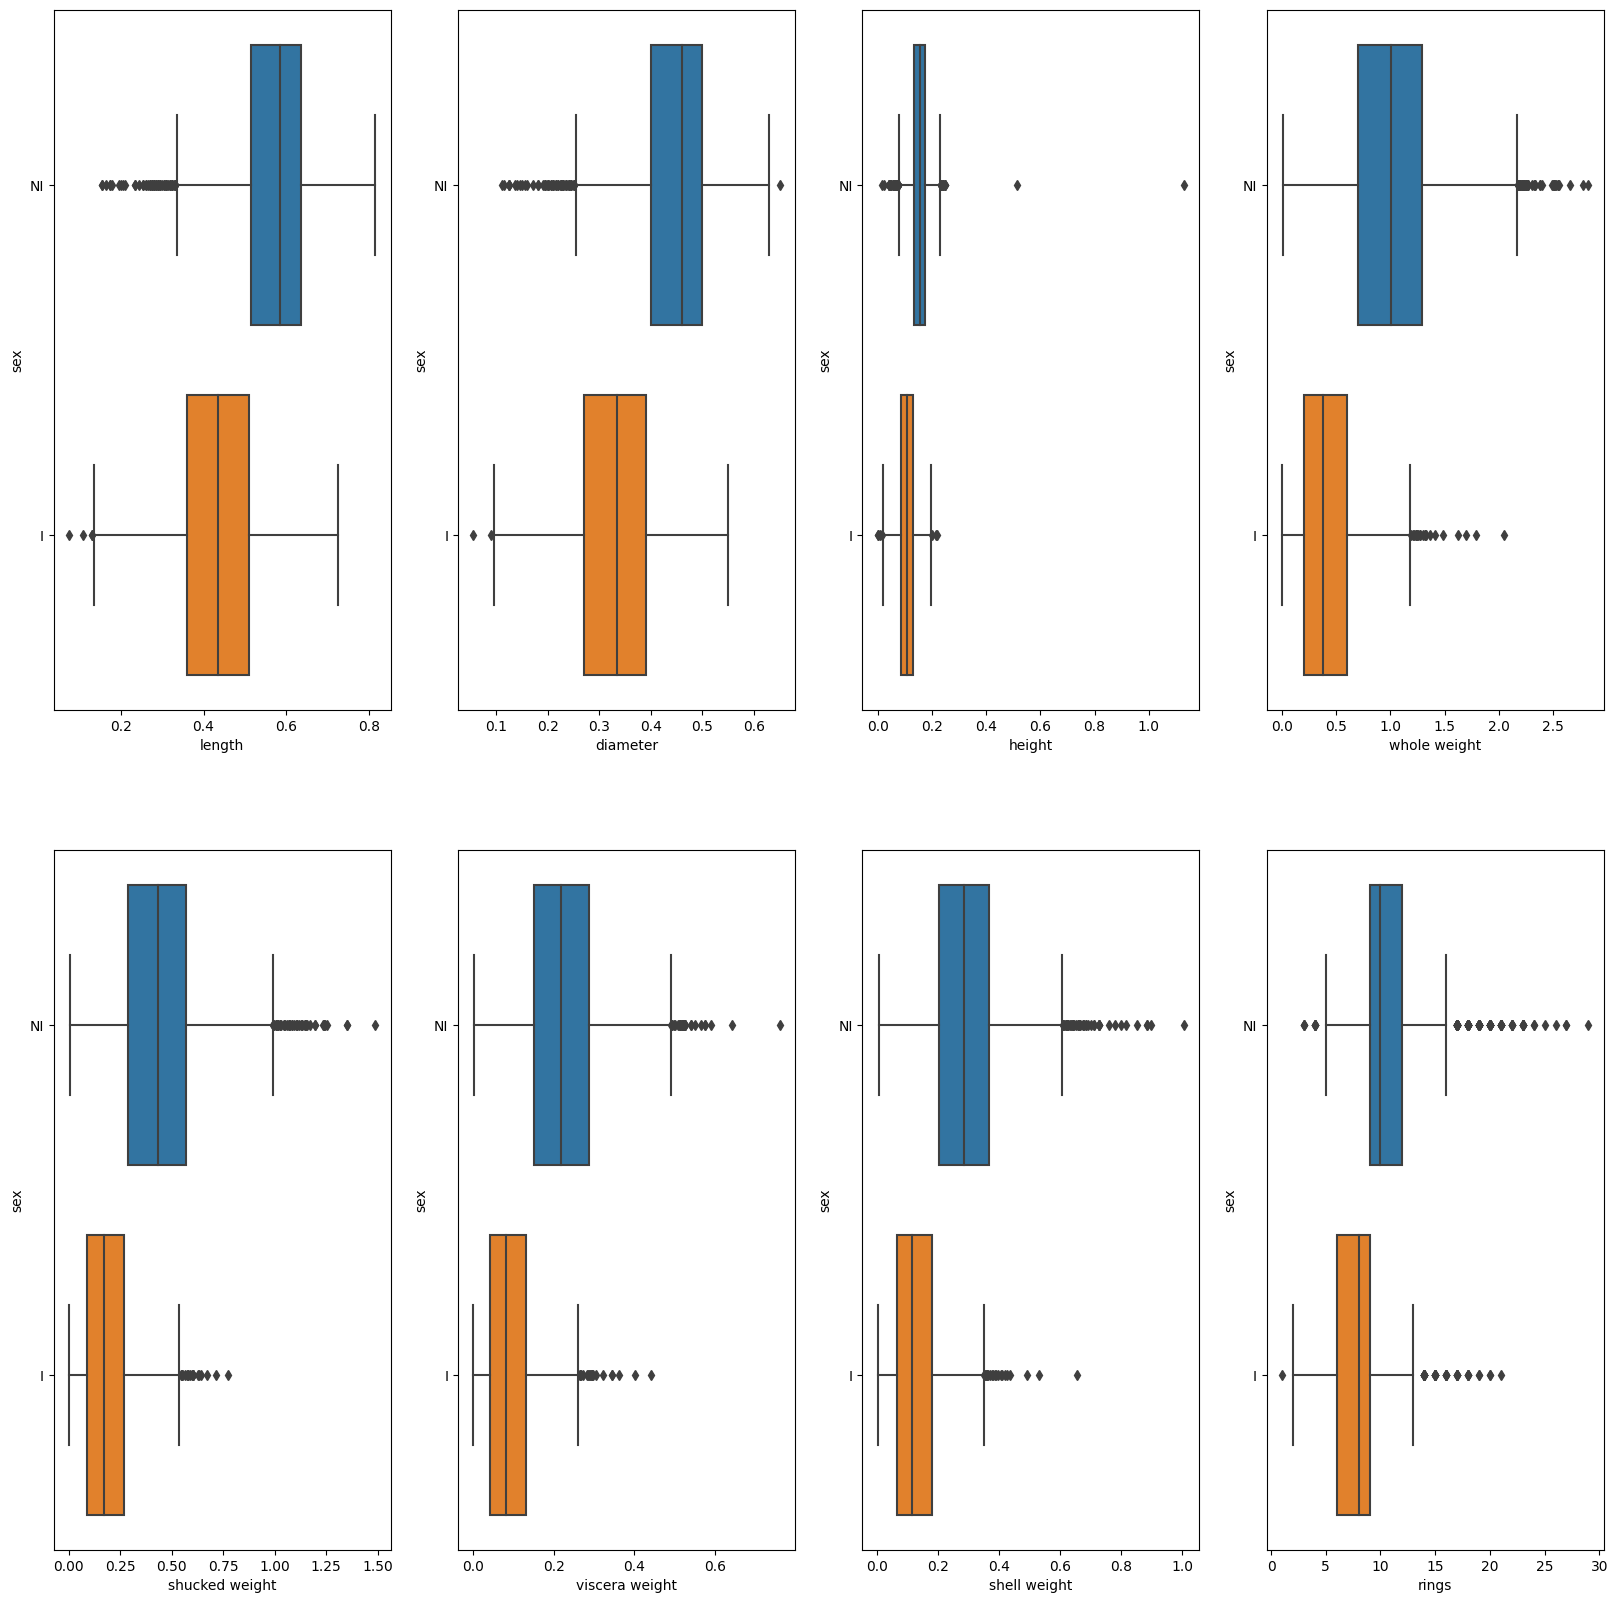

<Figure size 640x480 with 0 Axes>

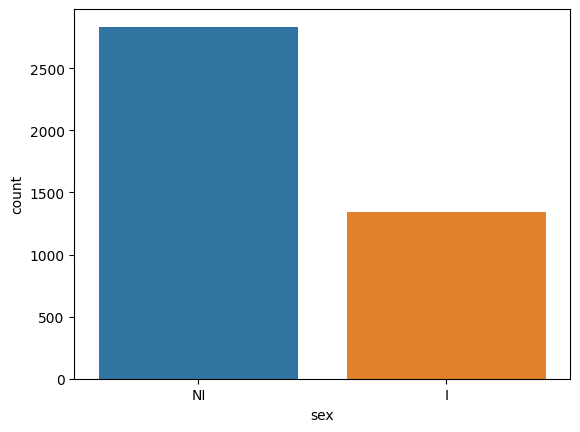

In [6]:
fig, ax = plt.subplots(2, 4)
for counter, col in enumerate(df_abalone.columns[1:]):
    i = counter // 4
    j = counter % 4
    sns.boxplot(ax=ax[i,j], data=df_abalone, x=col, y="sex")
fig.set_size_inches(20,20)
plt.show()

plt.clf()
fig, ax = plt.subplots()
sns.countplot(x=df_abalone["sex"])
plt.show()

In [12]:
df_features = df_abalone[[col for col in df_abalone.columns if col not in ["sex"] ]]
df_labels = df_abalone["sex"]

In [14]:
X = df_features.to_numpy()
Y, classes = pd.factorize(df_labels)

In [15]:
print(classes)
print(f"X_shape={X.shape}\tY_shape={Y.shape}")

Index(['NI', 'I'], dtype='object')
X_shape=(4177, 8)	Y_shape=(4177,)


In [17]:
#normalizacja danych
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [19]:
dict_param = dict()
dict_param["accuracy_mean"] = 0

for  k in range(1,21,2):
    for metric in ['euclidean', 'manhattan', 'cosine']:
        model_KNN = KNeighborsClassifier(n_neighbors=k, metric=metric)
        score = cross_val_score(model_KNN,X_norm, Y, cv=5, scoring="balanced_accuracy")
        
        if score.mean() > dict_param["accuracy_mean"]:
            dict_param["accuracy_mean"] = score.mean().round(3)
            dict_param["accuracy_std"] = score.std().round(3)
            dict_param["n_neighbors"] = k
            dict_param["metric_type"] = metric
            
print(dict_param)      

{'accuracy_mean': 0.803, 'accuracy_std': 0.041, 'n_neighbors': 19, 'metric_type': 'cosine'}


acc_balanced=0.788+-0.039


C:\Users\pmichalski1\PycharmProjects\pythonProjectJupyter\venv\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Figure size 640x480 with 0 Axes>

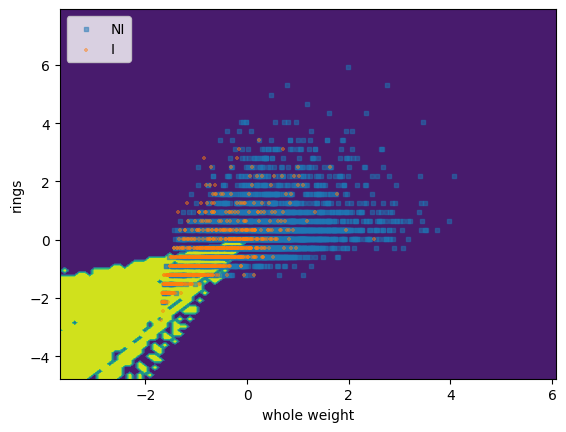

In [20]:
df_features = df_abalone[[col for col in df_abalone.columns if col in ["whole weight", "rings"]]]
df_labels = df_abalone["sex"]

X = df_features.to_numpy()
Y, classes = pd.factorize(df_labels)

# normalizacja
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

model_knn_2feat =  KNeighborsClassifier(n_neighbors=19 ,metric="cosine")
model_knn_2feat.fit(X_norm, Y)

# walidacja krzyżowa
scores = cross_val_score(model_knn_2feat, X_norm, Y, cv=5, scoring="balanced_accuracy")
print(f"acc_balanced={scores.mean().round(3)}+-{scores.std().round(3)}")

plt.clf()
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    estimator = model_knn_2feat,
    X = X_norm,
    ax=ax,
    response_method="predict",
    plot_method="contourf",
    shading="auto",
    xlabel="whole weight",
    ylabel= "rings",
    eps=2
)

markers = ["s", "+"]
for i, label in enumerate(classes):
  ax.scatter(X_norm[:, 0][Y == i], X_norm[:, 1][Y == i], label=label, marker=markers[i], alpha=0.5, s=10)
ax.legend(loc="upper left")
plt.show()